# Twitter Sentiment Analysis - Exploratory Data Analysis
This notebook analyzes the twitter training dataset to understand sentiment patterns, entity distribution, and text characteristics.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

# Display plot settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

In [11]:
# Load the dataset
# Based on file inspection, there are no headers. Columns are: ID, Entity, Sentiment, Text
col_names = ['id', 'entity', 'sentiment', 'text']
df = pd.read_csv('../data/twitter/twitter_training.csv', names=col_names, header=None)

# Display first few rows
df.head()

,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [12]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [13]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values if any (Simple handling for EDA)
df = df.dropna(subset=['text'])
print(f"Rows after dropping nulls: {len(df)}")

id             0
entity         0
sentiment      0
text         686
dtype: int64
Rows after dropping nulls: 73996


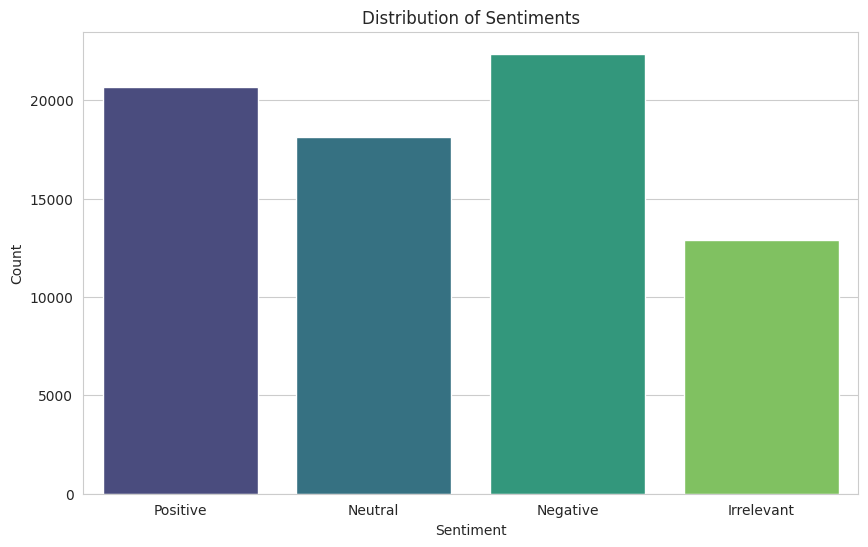

In [14]:
# 1. Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()

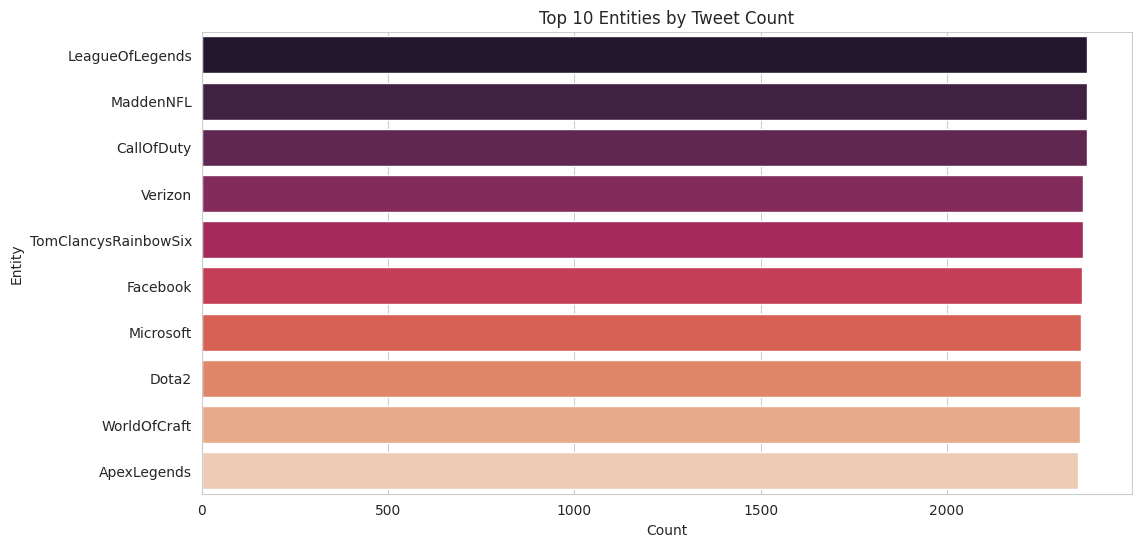

In [15]:
# 2. Entity Distribution (Top 10)
top_entities = df['entity'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.countplot(y='entity', data=df[df['entity'].isin(top_entities)], 
              order=top_entities, palette='rocket')
plt.title('Top 10 Entities by Tweet Count')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.show()

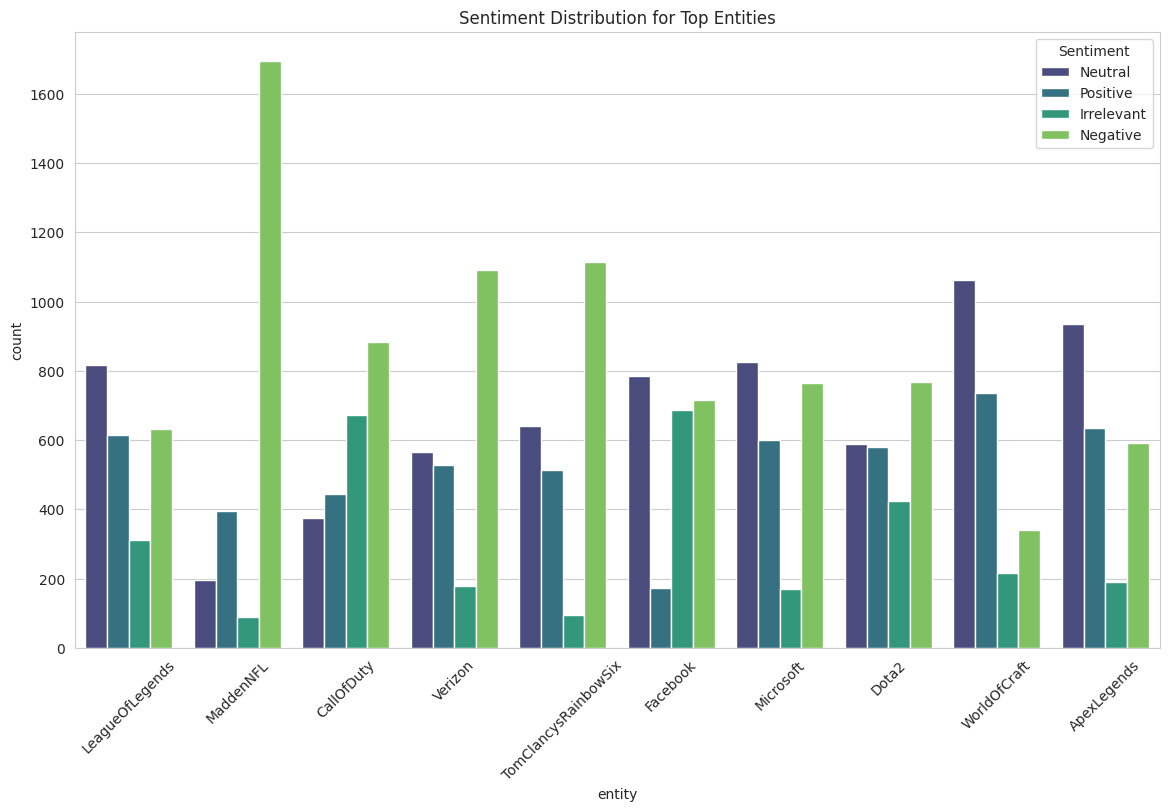

In [16]:
# 3. Sentiment breakdown for Top Entities
plt.figure(figsize=(14, 8))
sns.countplot(x='entity', hue='sentiment', data=df[df['entity'].isin(top_entities)], 
              order=top_entities, palette='viridis')
plt.title('Sentiment Distribution for Top Entities')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

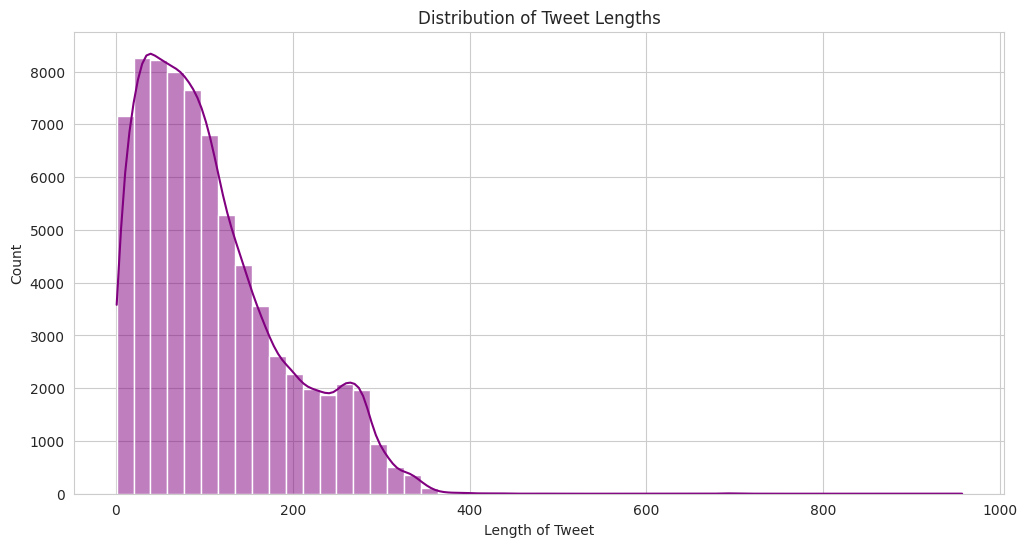

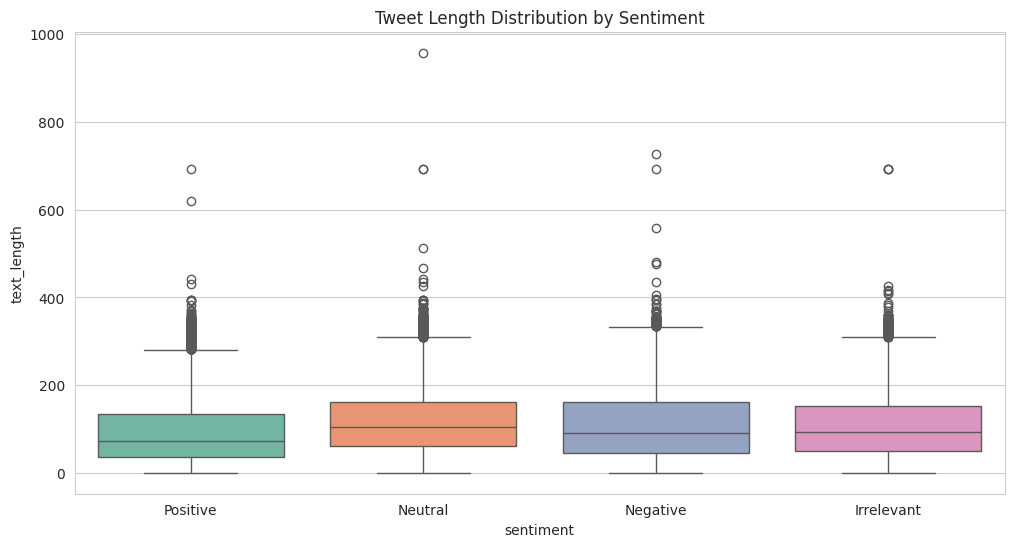

In [17]:
# 4. Text Length Analysis
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='purple')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Length of Tweet')
plt.show()

# Text length by sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='text_length', data=df, palette='Set2')
plt.title('Tweet Length Distribution by Sentiment')
plt.show()